In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dt=pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
dt.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Prepare training data

In [8]:
# get it as am numpy array
df=dt.iloc[:,1:2].values

In [9]:
df.shape

(1258, 1)

In [15]:
# create 2 list
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(df[i-60:i,0])
    y_train.append(df[i,0])

In [16]:
x_train,y_train= np.array(x_train), np.array(y_train)

In [21]:
# need it to be in 2d to fit into the model
x_train.shape

(1198, 60)

In [22]:
y_train.shape

(1198,)

# Prepare test data

In [27]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
Real_stock_price = df_test.iloc[:,1:2].values

In [38]:
Real_stock_price.shape

(20, 1)

In [29]:
total_dataset = pd.concat((dt['Open'], df_test['Open']),axis = 0 )

# len(total_dataset)-len(df_test) - 60 = 1278-20-60=1198, so inputs=total_dataset[1198:]=80 rows
# 60 rows from train and 20 from test
inputs = total_dataset[len(total_dataset)-len(df_test) - 60:].values 

In [30]:
inputs = inputs.reshape(-1,1)
inputs.shape # 2d

(80, 1)

In [31]:
x_test = []
for i in range (60,80):
    x_test.append(inputs[i-60:i,0])

In [32]:
x_test=np.array(x_test)
x_test.shape

(20, 60)

#  fit the data and evaluate

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lrm = LinearRegression()

In [26]:
lrm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
pred_lrm = lrm.predict(x_test)

In [41]:
# convert it to 2d for calculating the residual
pred_lrm = pred_lrm.reshape(-1,1)
pred_lrm.shape

(20, 1)

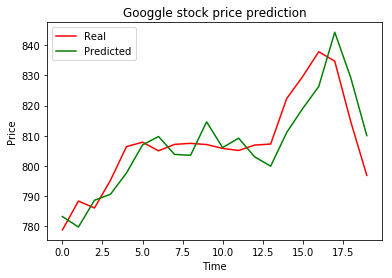

In [42]:
plt.plot(Real_stock_price,color='red', label='Real')
plt.plot(pred_lrm,color='green',label='Predicted')
plt.title('Googgle stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

0.715151175625


Text(0.5,1,'residual')

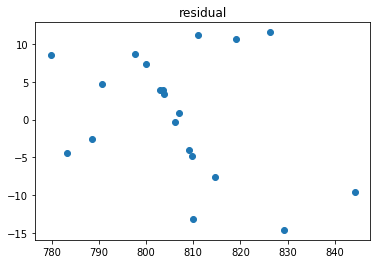

In [43]:
# R^2
from sklearn import metrics
print (metrics.r2_score(Real_stock_price, pred_lrm))

# residual
plt.scatter(pred_lrm,Real_stock_price-pred_lrm)
plt.title('residual')

In [44]:
# not bad